# Iris Class Prediction

This problem was discovered on the Interet and the dataset is available in the datasets folder on my page. In the problem, we are to predict the iris flower class based on the features. The prediction versus actual will be the final line in this project.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn import metrics
from sklearn import model_selection

Here is where the dataset is identified and loaded into a dataframe.​

In [2]:
columns=['sepal-length','sepal-width','petal-length','petal-width','class_name']
dataset=r'https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'
dataset=pd.read_csv(dataset, names=columns)

Here is where I summarized the dataset.

In [3]:
def aggregrate():
    print('The number of rows by columns:  {0}'.format(dataset.shape))
    print("\n"+'The first 10 records are:')
    print(dataset.head(10))
    print("\n"+'The dataset datatypes are:')
    print(dataset.dtypes)

In [4]:
aggregrate()

The number of rows by columns:  (150, 5)

The first 10 records are:
   sepal-length  sepal-width  petal-length  petal-width   class_name
0           5.1          3.5           1.4          0.2  Iris-setosa
1           4.9          3.0           1.4          0.2  Iris-setosa
2           4.7          3.2           1.3          0.2  Iris-setosa
3           4.6          3.1           1.5          0.2  Iris-setosa
4           5.0          3.6           1.4          0.2  Iris-setosa
5           5.4          3.9           1.7          0.4  Iris-setosa
6           4.6          3.4           1.4          0.3  Iris-setosa
7           5.0          3.4           1.5          0.2  Iris-setosa
8           4.4          2.9           1.4          0.2  Iris-setosa
9           4.9          3.1           1.5          0.1  Iris-setosa

The dataset datatypes are:
sepal-length    float64
sepal-width     float64
petal-length    float64
petal-width     float64
class_name       object
dtype: object


Here is where I will visualize the dataset features.

In [5]:
def visualize():
    histogram = dataset['sepal-length'].hist(edgecolor='black', bins=15)
    histogram.set_xlabel('Sepal Length')
    histogram.set_ylabel('Number of Records')
    histogram.set_title("Sepal Length Distribution", fontname="Arial", fontsize=12)
    plt.show()

    histogram = dataset['sepal-width'].hist(edgecolor='black', bins=15)
    histogram.set_xlabel('Sepal Width')
    histogram.set_ylabel('Number of Records')
    histogram.set_title("Sepal Width Distribution", fontname="Arial", fontsize=12)
    plt.show()

    histogram = dataset['petal-length'].hist(edgecolor='black', bins=15)
    histogram.set_xlabel('Petal Length')
    histogram.set_ylabel('Number of Records')
    histogram.set_title("Petal Length Distribution", fontname="Arial", fontsize=12)
    plt.show()

    histogram = dataset['petal-width'].hist(edgecolor='black', bins=15)
    histogram.set_xlabel('Petal WIdth')
    histogram.set_ylabel('Number of Records')
    histogram.set_title("Petal Width Distribution", fontname="Arial", fontsize=12)
    plt.show()

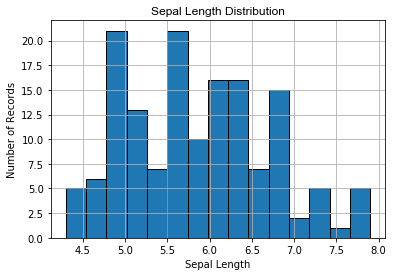

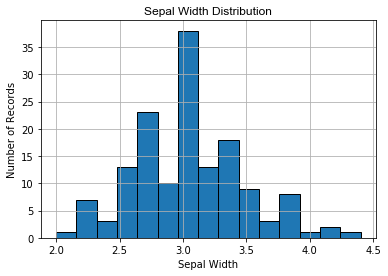

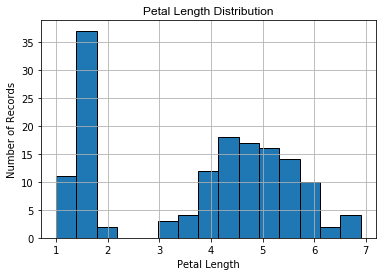

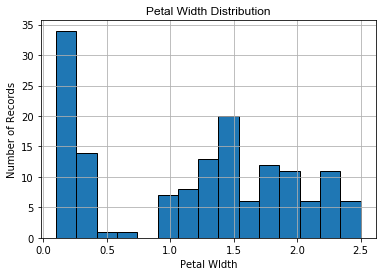

In [6]:
visualize()

Here is where I cleaned the dataset.

In [7]:
def clean():
    print(dataset.isnull().sum()) #check nulll values
    print(dataset.describe()) #check for low values in min

In [8]:
clean()

sepal-length    0
sepal-width     0
petal-length    0
petal-width     0
class_name      0
dtype: int64
       sepal-length  sepal-width  petal-length  petal-width
count    150.000000   150.000000    150.000000   150.000000
mean       5.843333     3.054000      3.758667     1.198667
std        0.828066     0.433594      1.764420     0.763161
min        4.300000     2.000000      1.000000     0.100000
25%        5.100000     2.800000      1.600000     0.300000
50%        5.800000     3.000000      4.350000     1.300000
75%        6.400000     3.300000      5.100000     1.800000
max        7.900000     4.400000      6.900000     2.500000


Here I will convert the string values to numericals for the machine learning model.

In [9]:
def preprocess_dataset(df):
    processed_df=df.copy()
    le=preprocessing.LabelEncoder()
    processed_df.class_name=le.fit_transform(processed_df.class_name)
    return processed_df
dataset=preprocess_dataset(dataset)

In [10]:
print(dataset.head(11))

    sepal-length  sepal-width  petal-length  petal-width  class_name
0            5.1          3.5           1.4          0.2           0
1            4.9          3.0           1.4          0.2           0
2            4.7          3.2           1.3          0.2           0
3            4.6          3.1           1.5          0.2           0
4            5.0          3.6           1.4          0.2           0
5            5.4          3.9           1.7          0.4           0
6            4.6          3.4           1.4          0.3           0
7            5.0          3.4           1.5          0.2           0
8            4.4          2.9           1.4          0.2           0
9            4.9          3.1           1.5          0.1           0
10           5.4          3.7           1.5          0.2           0


Here I will identify the feature and target column and split the dataset into training and testing.

In [11]:
feature=['sepal-length','sepal-width','petal-length','petal-width']
target='class_name'
x=dataset[feature]
y=dataset[target]
seed=7
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.4,random_state=4)

Here I will determine the best model for this problem using the below function.

In [17]:
def algorithms():
    print('The predicted accuracy scores for the models are as follows:')
    lr=LogisticRegression()
    lr.fit(x_train,y_train)
    lr_prediction=lr.predict(x_test)
    print('LR: {0:4f}'.format(metrics.accuracy_score(y_test,lr_prediction)))

    lda=LinearDiscriminantAnalysis()
    lda.fit(x_train,y_train)
    lda_prediction=lda.predict(x_test)
    print('LDA: {0:4f}'.format(metrics.accuracy_score(y_test,lda_prediction)))

    knn=KNeighborsClassifier()
    knn.fit(x_train,y_train)
    knn_prediction=knn.predict(x_test)
    print('KNN: {0:4f}'.format(metrics.accuracy_score(y_test,knn_prediction)))

    cart=DecisionTreeClassifier()
    cart.fit(x_train,y_train)
    cart_prediction=cart.predict(x_test)
    print('CART: {0:4f}'.format(metrics.accuracy_score(y_test,cart_prediction)))

    nb=GaussianNB()
    nb.fit(x_train,y_train)
    nb_prediction=nb.predict(x_test)
    print('NB: {0:4f}'.format(metrics.accuracy_score(y_test,nb_prediction)))

In [18]:
algorithms()

The predicted accuracy scores for the models are as follows:
LR: 0.950000
LDA: 0.966667
KNN: 0.966667
CART: 0.966667
NB: 0.966667


I have chosen the KNN model. Here I will determine the best n_neighbors value.

In [19]:
def knn():
    k_range=list(range(1, 26))
    scores=[]
    for k in k_range:
        knn = KNeighborsClassifier(n_neighbors=k)
        knn.fit(x_train, y_train)
        y_pred = knn.predict(x_test)
        scores.append(metrics.accuracy_score(y_test, y_pred))

    plt.plot(scores)
    plt.ylabel('Testing Accuracy')
    plt.xlabel('Value of K for KNN')
    plt.show()

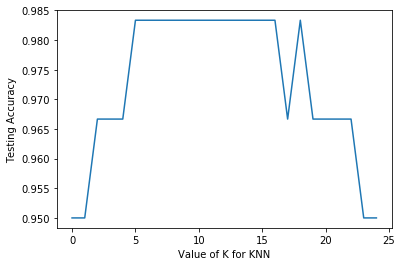

In [20]:
knn()

Here I will fit the machine learning model.

In [23]:
knn=KNeighborsClassifier(n_neighbors=7)
knn.fit(x_train,y_train)
knn_prediction=knn.predict(x_test)

In [25]:
features=x_test.reset_index()
features=features[['sepal-length', 'sepal-width', 'petal-length', 'petal-width']]
actual=(list(y_test))
prediction=(list(knn_prediction))
features['actual']=pd.Series(actual)
features['prediction']=pd.Series(prediction)
final=features

In [26]:
print(list(final['actual']))

[2, 0, 2, 2, 2, 1, 1, 0, 0, 2, 0, 0, 0, 1, 2, 0, 1, 0, 0, 2, 0, 2, 1, 0, 0, 0, 0, 0, 0, 2, 1, 0, 2, 0, 1, 2, 2, 1, 1, 0, 2, 0, 1, 0, 2, 0, 0, 1, 1, 2, 0, 1, 2, 2, 1, 1, 0, 1, 2, 1]


In [27]:
print(list(final['prediction']))

[2, 0, 2, 2, 2, 1, 2, 0, 0, 2, 0, 0, 0, 1, 2, 0, 1, 0, 0, 2, 0, 2, 1, 0, 0, 0, 0, 0, 0, 2, 1, 0, 2, 0, 1, 2, 2, 1, 1, 0, 2, 0, 1, 0, 2, 0, 0, 1, 1, 2, 0, 1, 2, 2, 1, 1, 0, 1, 2, 1]


In [28]:
print(final[['actual','prediction']])

    actual  prediction
0        2           2
1        0           0
2        2           2
3        2           2
4        2           2
5        1           1
6        1           2
7        0           0
8        0           0
9        2           2
10       0           0
11       0           0
12       0           0
13       1           1
14       2           2
15       0           0
16       1           1
17       0           0
18       0           0
19       2           2
20       0           0
21       2           2
22       1           1
23       0           0
24       0           0
25       0           0
26       0           0
27       0           0
28       0           0
29       2           2
30       1           1
31       0           0
32       2           2
33       0           0
34       1           1
35       2           2
36       2           2
37       1           1
38       1           1
39       0           0
40       2           2
41       0           0
42       1 

Here I plot the actual values versus predicted.

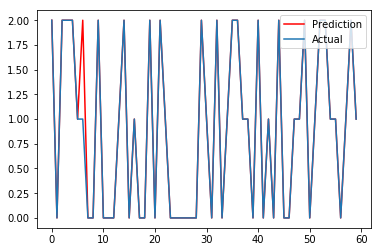

In [29]:
plt.plot(knn_prediction, label='Prediction',color='Red')
plt.plot(list(y_test),label='Actual')
plt.legend(loc='upper right')
plt.show()